In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import nltk
# nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

import re
import gensim

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [18]:
sid = SentimentIntensityAnalyzer()
df = pd.read_csv("p_skytrax.csv")

In [19]:
# get the polarity scores and parse them to different columns
df['scores'] = df['cleaned_body'].apply(lambda review: sid.polarity_scores(review))

df['pos_score']  = df['scores'].apply(lambda score_dict: score_dict['pos'])
df['neu_score']  = df['scores'].apply(lambda score_dict: score_dict['neu'])
df['neg_score']  = df['scores'].apply(lambda score_dict: score_dict['neg'])
df['compound_score']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

In [24]:
# extract the reviews and scores columns to separate df
col_names = ['cleaned_body', 'pos_score', 'neu_score', 'neg_score', 'compound_score']
review_df = df[col_names]
review_df.to_csv("reviews_scores.csv")

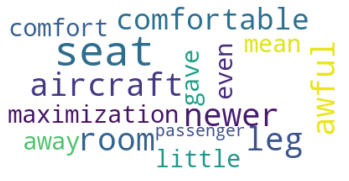

pos_score 0.256
neu_score 0.604
neg_score 0.139
compound_score 0.3626


In [25]:
# view an instance of the review
review = review_df.loc[0] 
# print("text",review["cleaned_body"])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(review["cleaned_body"])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("pos_score",review["pos_score"])
print("neu_score",review["neu_score"])
print("neg_score",review["neg_score"])
print("compound_score",review["compound_score"])

In [28]:
def get_sentiment(scores, threshold=0.05):
    val = "neutral"
    if scores["compound_score"] > threshold:
        val = "positive"
    elif scores["compound_score"] < threshold:
        val = "negative"
    return val


review_df["sentiment"] = review_df.apply(get_sentiment,axis=1)

/var/folders/y_/ff7_m0c146ddrr_mctd4vpkh0000gn/T/ipykernel_10895/2143986317.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df["sentiment"] = review_df.apply(get_sentiment,axis=1)


In [30]:
review_df.head(5)

,cleaned_body,pos_score,neu_score,neg_score,compound_score,sentiment
0,newer aircraft leg room awful seat comfortable...,0.256,0.604,0.139,0.3626,positive
1,check easy boarding zone think paid check kg l...,0.227,0.705,0.068,0.7430,positive
2,solid experience start finish especially given...,0.172,0.777,0.051,0.8979,positive
3,discovered upon boarding four year old allocat...,0.113,0.726,0.161,-0.5267,negative
4,got seat near emergency exit different standar...,0.183,0.660,0.157,0.2960,positive
